# <font color='Purple'>**Convolutional Neural Network (CNN) using DICOM files containing CT Medical Images from cancer imaging archive**</font>

## <font color='green'>**1. Dataset Information**</font>
The data are a tiny subset of images from the cancer imaging archive. They consist of the middle slice of all CT images taken where valid age, modality, and contrast tags could be found. This results in 475 series from 69 different patients.

**TCIA Archive Link** - https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD

**License**
http://creativecommons.org/licenses/by/3.0/
After the publication embargo period ends these collections are freely available to browse, download, and use for commercial, scientific and educational purposes as outlined in the Creative Commons Attribution 3.0 Unported License. Questions may be directed to help@cancerimagingarchive.net. Please be sure to acknowledge both this data set and TCIA in publications by including the following citations in your work:

**Data Citation**
Albertina, B., Watson, M., Holback, C., Jarosz, R., Kirk, S., Lee, Y., … Lemmerman, J. (2016). Radiology Data from The Cancer Genome Atlas Lung Adenocarcinoma [TCGA-LUAD] collection. The Cancer Imaging Archive. http://doi.org/10.7937/K9/TCIA.2016.JGNIHEP5

**TCIA Citation**
Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. (paper)

## <font color='green'>**2. Import the Required Libraries & Modules**</font>
* pathlib for easy path handling
* pydicom to handle dicom files
* matplotlib for visualization
* numpy to create the 3D container

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pydicom 

## <font color='green'>**3. Load the DICOM files of CT Medical images**</font>
### <font color='orange'>**3.1 Extraction of single dicom image file**</font>
At first read a single dicom file using the **read_file(path)** function provided by pydicom and *print* the dicom file to get a bulk of information, containing e.g the company which built the scanner (SIEMENS in this case), the shape of the image (*Rows, Columns*, 512x512 in this case), table height all information about the patient (of course the personal information is anonymized here), and of large importance, the **image orientation**

In [2]:
sample_dcm = "/kaggle/input/siim-medical-images/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(sample_dcm)  # read single dicom file
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

Accessing DICOM **header** information:
Access the dicom tags by using the hexadecimal encoded identifiers at the start of each line. As an example, to get the shape of the image those two identifiers can be used:

* (0028, 0010) Rows
* (0028, 0011) Columns
* (0018, 0015) Body Part Examined

The '0x' in front of the identifier tells the python interpreter that it should interpret this value as hexadecimal

In [3]:
print(dicom_file[0x0028, 0x0010])
print(dicom_file[0x0028, 0x0011])
print(dicom_file[0x0018, 0x0015])

(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0018, 0015) Body Part Examined                  CS: 'CHEST'


There is an alternative, more direct way to access the values of the DICOM header tags using the tag descriptions like 'Rows', 'Columns', and 'BodyPartExamined' (so-called Pascal Case)

In [4]:
print('Rows: ', dicom_file.Rows)
print('Columns: ', dicom_file.Columns)
print('Body Part Examined: ', dicom_file.BodyPartExamined)

Rows:  512
Columns:  512
Body Part Examined:  CHEST


Accessing DICOM **body** information (the actual image). 
The **pixel_array** contains the actual image data. 
**'.pixel_array'** can be used to extract the actual image data from the dicom file. 

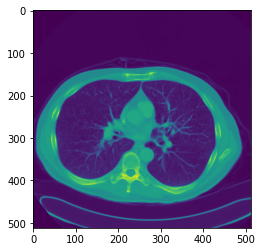

In [5]:
ct = dicom_file.pixel_array # load the image pixel data as a numpy array
plt.figure()
plt.imshow(ct);

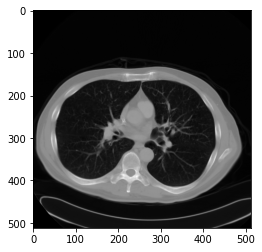

In [6]:
plt.imshow(ct, cmap="gray");

Check the image shape corresponding to the Rows and Columns seen earlier in the header information (512x512)

In [7]:
print(ct.shape)

(512, 512)


### <font color='orange'>**3.2 Extraction of all dicom image files**</font>

In [8]:
path_dir = Path('/kaggle/input/siim-medical-images/dicom_dir')
all_files = list(path_dir.glob("*"))
all_files

[PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0063_AGE_0073_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0077_AGE_0074_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0073_AGE_0074_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0060_AGE_0080_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0051_AGE_0063_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0091_AGE_0072_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0076_AGE_0068_CONTRAST_0_CT.dcm'),
 PosixPath('/kaggle/input/siim-medical-images/dicom_dir/ID_0

In [9]:
dicom_images = []
import cv2
for path in all_files:
    data = pydicom.read_file(path).pixel_array # read all DICOM files
    data = cv2.resize(data,(256,256))
    dicom_images.append(data)
print(len(dicom_images))
X = np.array(dicom_images)
print(X.shape)

100
(100, 256, 256)


In [10]:
X = X.reshape(100, 256,256, 1)
X.shape

(100, 256, 256, 1)

In [11]:
import os
labels =[]
for file in os.listdir('/kaggle/input/siim-medical-images/dicom_dir'):
    labels.append(file.split('_')[-2])
print(len(labels))
y = np.array(labels)
y.shape

100


(100,)

In [12]:
set(labels)

{'0', '1'}

## <font color='green'>**4. Dataset Visualization**</font>

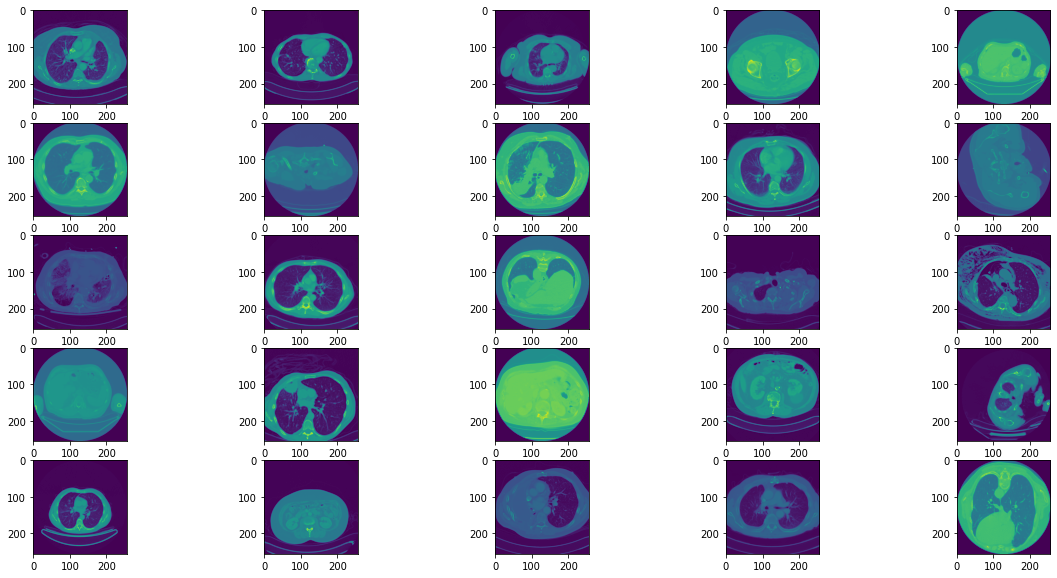

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X[i])
plt.show();
plt.tight_layout();

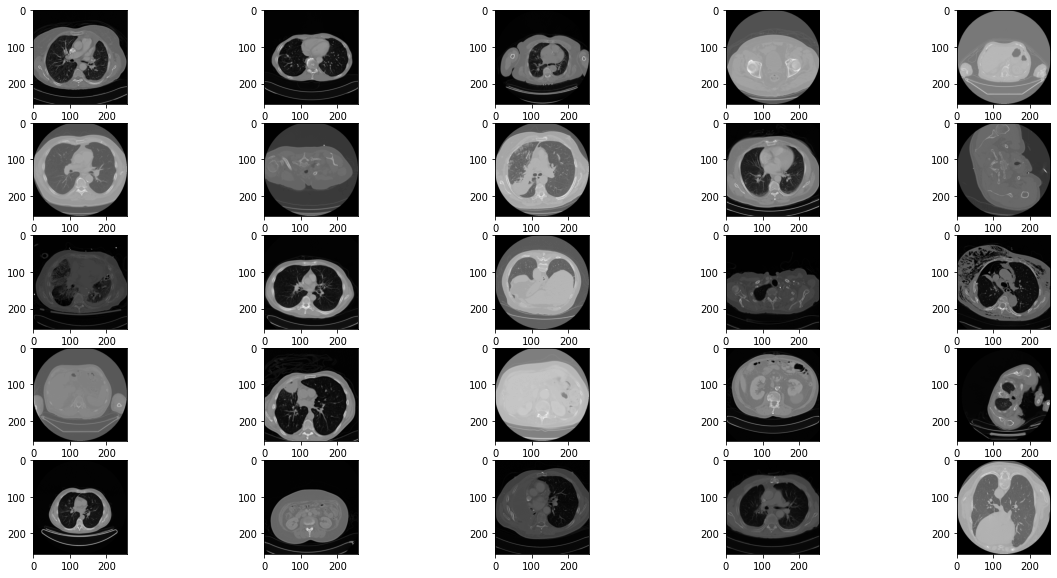

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X[i], cmap="gray");
plt.show();
plt.tight_layout();

## <font color='green'>**5. Data Preprocessing**</font>

In [15]:
input_shape=X.shape[1:]
input_shape

(256, 256, 1)

In [16]:
from numpy import unique
n_classes= len(unique(y))
n_classes

2

In [17]:
classes = unique(y)
classes

array(['0', '1'], dtype='<U1')

In [18]:
from sklearn.model_selection import train_test_split as tts
X_trains, X_tests, y_train, y_test = tts(X, y, test_size = 0.2)
X_train= X_trains.astype('float32')/255.0 # convert image to floats in [0, 1] range
X_test= X_tests.astype('float32')/255.0
X_train[0:1]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]], dtype=float32)

## <font color='green'>**6. Model Development**</font>

In [19]:
y_train.shape, y_test.shape

((80,), (20,))

In [20]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train.shape, y_test.shape

((80, 2), (20, 2))

In [21]:
X_train.shape, X_test.shape

((80, 256, 256, 1), (20, 256, 256, 1))

In [22]:
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Apply Convolution and ReLU
# Apply filter (Number of filters = 32, Kernel size = (3,3)) with Convolution to filter an image for a particular feature
# Detect that feature within the filtered image using ReLU
#model=models.Sequential()
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape))

# Apply MaxPool (Condense the image to enhance the features using maximum pooling with pool size = (2,2)))
# model.add(layers.MaxPooling2D(2,2))
model.add(MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Apply Flatten to transform matrix to vector form
#model.add(layers.Flatten())
model.add(Flatten())

# Define model
#model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(n_classes,activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=10,verbose=1)
model.summary()

2023-01-08 17:22:14.931434: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-08 17:22:15.156451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
8/8 [==============================] - 4s 346ms/step - loss: 95.3495 - accuracy: 0.4625
Epoch 2/10
8/8 [==============================] - 2s 261ms/step - loss: 10.6490 - accuracy: 0.6375
Epoch 3/10
8/8 [==============================] - 2s 260ms/step - loss: 1.7869 - accuracy: 0.8000
Epoch 4/10
8/8 [==============================] - 2s 257ms/step - loss: 0.2794 - accuracy: 0.8625
Epoch 5/10
8/8 [==============================] - 2s 268ms/step - loss: 0.0582 - accuracy: 0.9625
Epoch 6/10
8/8 [==============================] - 2s 267ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 2s 258ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 2s 262ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 2s 257ms/step - loss: 6.9887e-04 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 2s 258ms/step - loss: 2.7068e-04 - accuracy: 1.0000
Model: "s

## <font color='green'>**7. Model Evaluation**</font>

1/1 [==============================] - 0s 380ms/step - loss: 0.9452 - accuracy: 0.8000
Accuracy of model is : 0.800


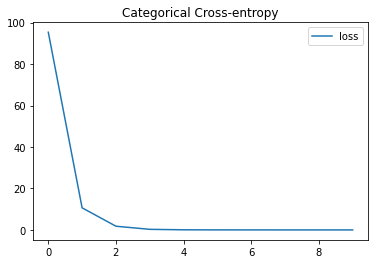

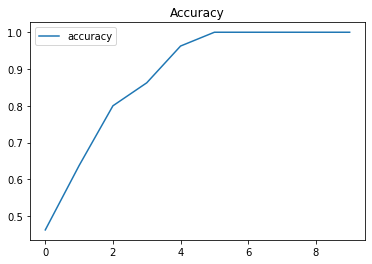

In [23]:
# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)

## <font color='green'>**8. Model Prediction**</font>

Predicted = 1
Actual: 1


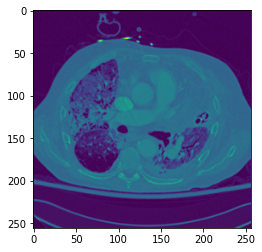

In [24]:
# Predict Model
image=X_train[8]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
print('Actual:', y[8])
plt.imshow(X_train[8]);

## <font color='green'>**9. Retrain Model after Data Augmentation using ImageDataGenerator**</font>

In [25]:
#Generating images for the Training set
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2, rotation_range = 40, 
                                   brightness_range = (0.5, 1.5), 
                                   width_shift_range = 0.1, height_shift_range = 0.1,
                                   horizontal_flip = True) # image augmentation only on training set
#Creating the Training set
history = model.fit(train_datagen.flow(X_train,y_train, batch_size = 10), epochs = 20, 
                    validation_data = (X_test,y_test))

Epoch 1/20
8/8 [==============================] - 3s 324ms/step - loss: 15.0246 - accuracy: 0.7000 - val_loss: 0.4978 - val_accuracy: 0.7500
Epoch 2/20
8/8 [==============================] - 3s 321ms/step - loss: 10.7608 - accuracy: 0.6125 - val_loss: 0.6200 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 3s 322ms/step - loss: 4.5043 - accuracy: 0.5125 - val_loss: 0.7878 - val_accuracy: 0.4500
Epoch 4/20
8/8 [==============================] - 3s 348ms/step - loss: 3.1054 - accuracy: 0.4875 - val_loss: 0.8221 - val_accuracy: 0.3500
Epoch 5/20
8/8 [==============================] - 3s 319ms/step - loss: 1.7251 - accuracy: 0.5875 - val_loss: 0.8334 - val_accuracy: 0.2500
Epoch 6/20
8/8 [==============================] - 3s 322ms/step - loss: 1.2175 - accuracy: 0.5750 - val_loss: 0.8378 - val_accuracy: 0.4000
Epoch 7/20
8/8 [==============================] - 3s 324ms/step - loss: 0.8423 - accuracy: 0.5625 - val_loss: 0.8484 - val_accuracy: 0.4500
Epoch 8/20
8/8 [==

1/1 [==============================] - 0s 142ms/step - loss: 0.8704 - accuracy: 0.4500
Accuracy of model is : 0.450


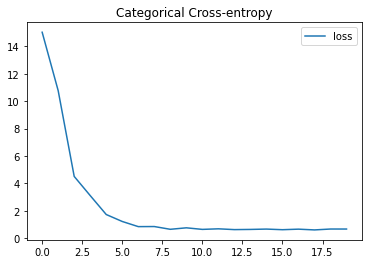

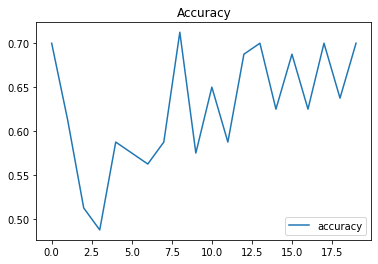

In [26]:
# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")
print('Accuracy of model is : %.3f' %acc)

Predicted = 1
Actual: 1


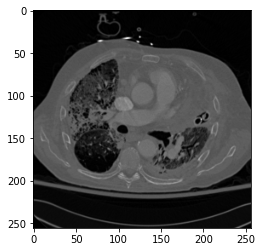

In [27]:
# Predict Model
image=X_train[8]
from numpy import argmax
ypred= model.predict(np.asarray([image]))
print('Predicted = %d' %argmax(ypred))
print('Actual:', y[8])
plt.imshow(X_train[8], 'gray');